In [71]:
from casadi import *
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [72]:
g = SX.sym('g')

In [73]:
Cd = SX.sym('Cd')

In [74]:
Cl = SX.sym('Cl')

In [75]:
vt = SX.sym('vt')

In [76]:
v = SX.sym('v')

In [77]:
theta = SX.sym('theta')

In [78]:
x = SX.sym('x')

In [79]:
y = SX.sym('y')

In [80]:
ode = vertcat(-g*sin(theta)-Cd*g*v**2/(Cl*vt**2), -g*cos(theta)/v + g*v/(vt**2), v*cos(theta), v*sin(theta))

In [81]:
dae = {'x':vertcat(v,theta,x,y),'p':vertcat(g,Cd,Cl,vt),'ode':ode}

In [82]:
opts = {}
#opts["fsens_err_con"] = True
#opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
tend = 100
opts["t0"] = 0
opts["tf"] = tend

In [83]:
ts = numpy.linspace(0,tend,5000)

In [84]:
opts["grid"] = ts
opts["output_t0"] = True

In [85]:
F = integrator("F","cvodes",dae,opts)

In [87]:
v0 = 30.0; theta0 = 0; x0 = 0; y0 = 1000
g = 9.8; Cd = 1.0/40; Cl = 1.0; vt = v0;

In [88]:
sol = F(x0 = (v0,theta0,x0,y0), p = (g,Cd,Cl,vt))

In [89]:
sol = sol['xf'].full().T

In [90]:
x = sol[:,2]
y = sol[:,3]

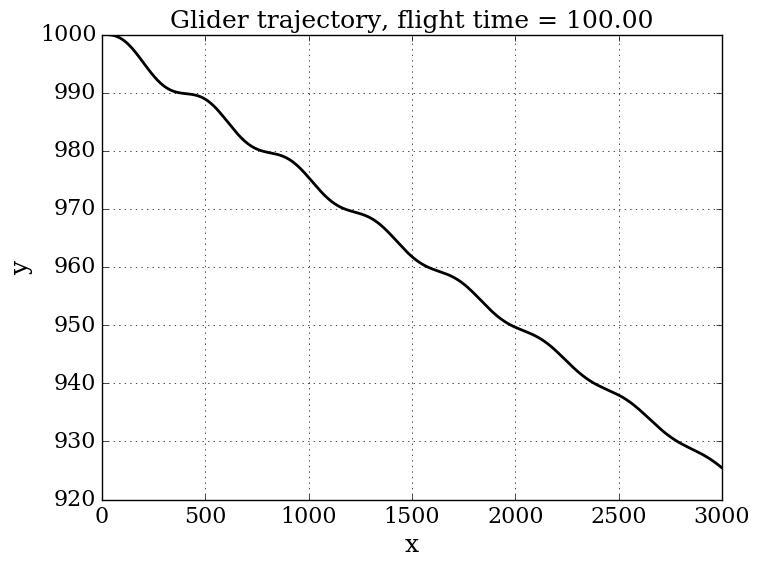

In [91]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % tend, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);